# Modeling

In [90]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
import scipy.stats as stats
import itertools
from sklearn import metrics
import pickle
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('./genre_csv/all_genre_CSV')

In [7]:
df.head()

,1,3,4,5,A,A#/Bb,B,C,C#/Db,"Color_['#', '0']",...,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,valence,Minor,Major
0,0.0,0.0,1,0.0,1,0,0,0,0,0.0,...,0.558,0.556,0.000000,9,0.0869,-8.358,0.0564,0.905,0,1
1,0.0,0.0,1,0.0,0,1,0,0,0,0.0,...,0.538,0.551,0.000000,10,0.0515,-8.128,0.0802,0.963,0,1
2,0.0,0.0,1,0.0,0,0,0,0,0,0.0,...,0.505,0.192,0.000000,8,0.1060,-12.267,0.0283,0.485,0,1
3,0.0,0.0,1,0.0,1,0,0,0,0,1.0,...,0.506,0.686,0.000000,9,0.0613,-6.949,0.1180,0.834,0,1
4,0.0,0.0,1,0.0,1,0,0,0,0,0.0,...,0.554,0.677,0.000002,9,0.0840,-7.728,0.0711,0.964,0,1


## Train Test Split

In [9]:
X = df.drop(['Genre'], axis = 1)
y = df['Genre']

In [10]:
# using standard scaler to scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [11]:
df = pd.DataFrame(X, columns=X.columns)

In [13]:
# training/test
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

## Plotting Function for Confusion Matrix

In [34]:
classes = ['50s Hits',
           'Classical',
           'detroit_techo',
           'disco',
           'electro indie pop',
           'electronic',
           'french',
           'hip hop',
           'industrial pop',
           'post rock',
           'rockabilly',
           'ska',
           'sleep',
           'spanish']

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Base Model

In [35]:
dummies_clf = DummyClassifier()
dummies_clf.fit(X_train, y_train)
preds = dummies_clf.predict(X_test)
base_confusion_matrix = confusion_matrix(y_test, preds)
base_classification_report = classification_report(y_test, preds)
print(base_confusion_matrix)
print(base_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))

[[1 0 0 1 0 2 0 0 3 0 2 1 1 1]
 [1 0 1 0 0 1 1 5 0 4 0 2 3 4]
 [1 0 0 0 1 0 0 1 1 2 2 0 0 2]
 [0 4 0 3 2 1 1 1 0 0 2 1 4 0]
 [1 1 3 0 0 1 2 1 2 5 3 2 0 2]
 [0 2 2 0 2 1 0 3 5 1 1 0 3 0]
 [0 0 0 0 1 1 0 1 1 2 0 2 0 2]
 [1 2 1 1 1 1 0 1 3 2 0 3 0 2]
 [2 3 1 2 1 4 0 3 3 1 1 2 0 1]
 [1 2 1 0 1 1 1 1 1 0 1 1 3 2]
 [0 3 2 0 2 4 1 2 0 0 0 1 0 1]
 [2 2 0 1 1 1 1 4 0 3 0 3 3 0]
 [1 3 1 0 0 1 2 3 2 0 1 1 4 0]
 [0 0 0 0 1 0 1 3 0 1 0 1 1 0]]
                   precision    recall  f1-score   support

         50s Hits       0.09      0.08      0.09        12
        classical       0.00      0.00      0.00        22
    detroit_techo       0.00      0.00      0.00        10
            disco       0.38      0.16      0.22        19
electro indie pop       0.00      0.00      0.00        23
       electronic       0.05      0.05      0.05        20
           french       0.00      0.00      0.00        10
          hip hop       0.03      0.06      0.04        18
   industrial pop       0.14     

In [36]:
base_model_results = list(zip(list(preds), list(y_test)))
base_model_results

[('post rock', 'electro indie pop'),
 ('electro indie pop', 'ska'),
 ('hip hop', 'spanish'),
 ('sleep', 'classical'),
 ('50s Hits', 'ska'),
 ('electronic', 'electronic'),
 ('sleep', 'sleep'),
 ('hip hop', 'ska'),
 ('detroit_techo', 'electro indie pop'),
 ('industrial pop', 'electro indie pop'),
 ('post rock', 'detroit_techo'),
 ('classical', 'sleep'),
 ('ska', 'spanish'),
 ('50s Hits', 'industrial pop'),
 ('rockabilly', 'disco'),
 ('ska', 'classical'),
 ('disco', 'disco'),
 ('hip hop', 'sleep'),
 ('classical', 'post rock'),
 ('electronic', 'hip hop'),
 ('50s Hits', 'ska'),
 ('french', 'disco'),
 ('electronic', 'industrial pop'),
 ('rockabilly', 'detroit_techo'),
 ('classical', 'industrial pop'),
 ('classical', 'disco'),
 ('electronic', 'electro indie pop'),
 ('detroit_techo', 'rockabilly'),
 ('spanish', 'classical'),
 ('hip hop', 'electro indie pop'),
 ('hip hop', 'electronic'),
 ('industrial pop', '50s Hits'),
 ('ska', 'industrial pop'),
 ('french', 'electro indie pop'),
 ('ska', 'ska

Confusion Matrix, without normalization
[[1 0 0 1 0 2 0 0 3 0 2 1 1 1]
 [1 0 1 0 0 1 1 5 0 4 0 2 3 4]
 [1 0 0 0 1 0 0 1 1 2 2 0 0 2]
 [0 4 0 3 2 1 1 1 0 0 2 1 4 0]
 [1 1 3 0 0 1 2 1 2 5 3 2 0 2]
 [0 2 2 0 2 1 0 3 5 1 1 0 3 0]
 [0 0 0 0 1 1 0 1 1 2 0 2 0 2]
 [1 2 1 1 1 1 0 1 3 2 0 3 0 2]
 [2 3 1 2 1 4 0 3 3 1 1 2 0 1]
 [1 2 1 0 1 1 1 1 1 0 1 1 3 2]
 [0 3 2 0 2 4 1 2 0 0 0 1 0 1]
 [2 2 0 1 1 1 1 4 0 3 0 3 3 0]
 [1 3 1 0 0 1 2 3 2 0 1 1 4 0]
 [0 0 0 0 1 0 1 3 0 1 0 1 1 0]]


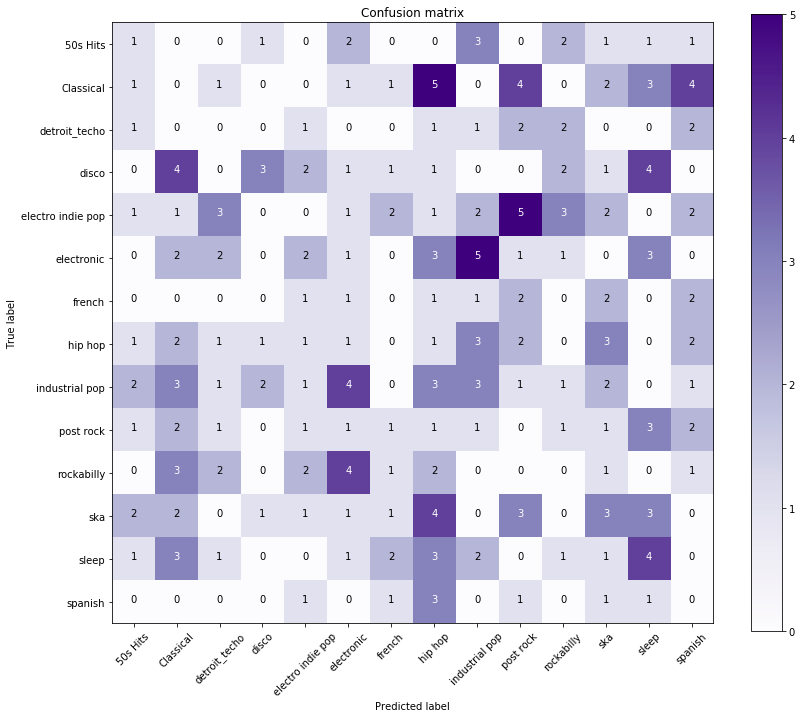

In [37]:
plot_confusion_matrix(base_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

## KNN

In [249]:
# retreiving best K value
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='micro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    return best_k

In [39]:
# retriving best K value
find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

Best Value for k: 15
F1-Score: 0.3487394957983193


In [40]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [41]:
# retreiving metrics
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))
    
print_metrics(y_test, preds)

Precision Score: 0.34763621214845186
Recall Score: 0.3487394957983193
Accuracy Score: 0.3487394957983193
F1 Score: 0.32769163269030016


In [42]:
KNN_confusion_matrix = confusion_matrix(y_test, preds)
KNN_classification_report = classification_report(y_test, preds)
print(KNN_confusion_matrix)
print(KNN_classification_report)
print_metrics(y_test, preds)

[[ 6  0  0  1  1  2  0  0  0  0  0  2  0  0]
 [ 0 13  0  0  0  0  0  0  0  2  0  0  7  0]
 [ 1  2  1  0  0  3  1  1  0  1  0  0  0  0]
 [ 1  0  1  9  0  0  2  2  1  1  0  2  0  0]
 [ 1  0  0  1 11  2  0  2  2  1  1  0  0  2]
 [ 3  2  0  2  2  8  0  1  0  2  0  0  0  0]
 [ 2  2  0  3  0  2  0  0  1  0  0  0  0  0]
 [ 3  0  1  0  3  0  0  5  2  0  0  2  0  2]
 [ 0  0  0  3  5  3  1  3  4  1  0  1  0  3]
 [ 2  1  0  2  0  6  0  2  1  2  0  0  0  0]
 [ 3  0  0  1  2  0  1  1  1  1  1  4  0  1]
 [ 3  0  0  1  4  0  0  1  3  0  0  6  0  3]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  2  1  0  0  1  0  0  1  0  3]]
                   precision    recall  f1-score   support

         50s Hits       0.24      0.50      0.32        12
        classical       0.52      0.59      0.55        22
    detroit_techo       0.33      0.10      0.15        10
            disco       0.39      0.47      0.43        19
electro indie pop       0.37      0.48      0.42        23
       electro

In [43]:
KNN_results = list(zip(list(preds), list(y_test)))
KNN_results

[('electronic', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('spanish', 'ska'),
 ('electronic', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('electro indie pop', 'electro indie pop'),
 ('industrial pop', 'electro indie pop'),
 ('french', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('spanish', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('sleep', 'sleep'),
 ('electronic', 'post rock'),
 ('50s Hits', 'hip hop'),
 ('ska', 'ska'),
 ('post rock', 'disco'),
 ('disco', 'industrial pop'),
 ('electronic', 'detroit_techo'),
 ('industrial pop', 'industrial pop'),
 ('disco', 'disco'),
 ('electro indie pop', 'electro indie pop'),
 ('hip hop', 'rockabilly'),
 ('classical', 'classical'),
 ('electronic', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('electronic', '50s Hits'),
 ('electro indie pop', 'industrial pop'),
 ('industrial pop', 'electro indie pop'),
 ('el

Confusion Matrix, without normalization
[[ 6  0  0  1  1  2  0  0  0  0  0  2  0  0]
 [ 0 13  0  0  0  0  0  0  0  2  0  0  7  0]
 [ 1  2  1  0  0  3  1  1  0  1  0  0  0  0]
 [ 1  0  1  9  0  0  2  2  1  1  0  2  0  0]
 [ 1  0  0  1 11  2  0  2  2  1  1  0  0  2]
 [ 3  2  0  2  2  8  0  1  0  2  0  0  0  0]
 [ 2  2  0  3  0  2  0  0  1  0  0  0  0  0]
 [ 3  0  1  0  3  0  0  5  2  0  0  2  0  2]
 [ 0  0  0  3  5  3  1  3  4  1  0  1  0  3]
 [ 2  1  0  2  0  6  0  2  1  2  0  0  0  0]
 [ 3  0  0  1  2  0  1  1  1  1  1  4  0  1]
 [ 3  0  0  1  4  0  0  1  3  0  0  6  0  3]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  2  1  0  0  1  0  0  1  0  3]]


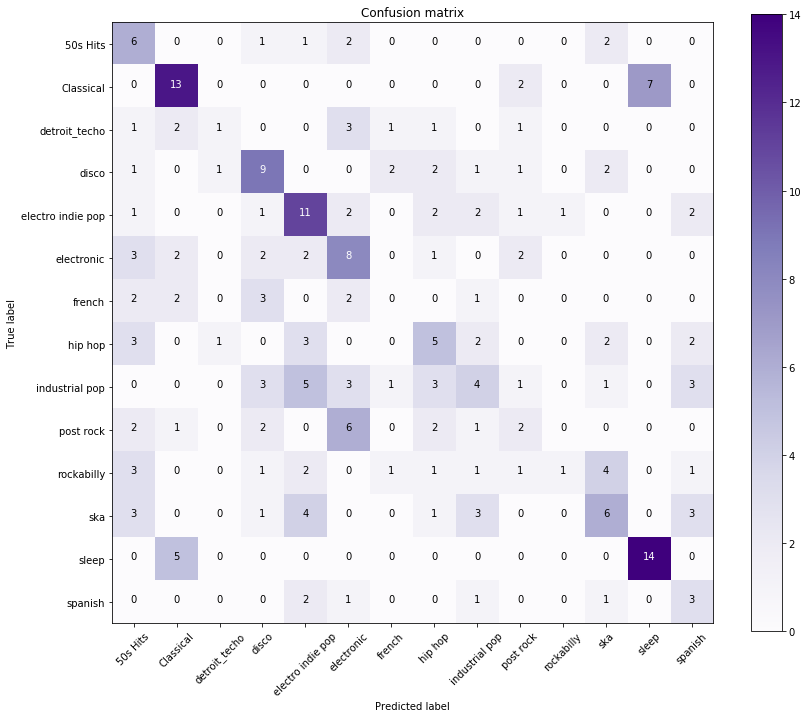

In [44]:
plot_confusion_matrix(KNN_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

In [74]:
# saving first KNN model
filename = './models/KNN_model_1.sav'
pickle.dump(knn, open(filename, 'wb'))

## Random Forest
### Model 1
#### Not Using GridSearch Parameters

In [62]:
forest = RandomForestClassifier(n_estimators=300, max_depth= 60)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
Random_Forest_score = forest.score(X_test, y_test)
Random_Forest_score

0.592436974789916

In [71]:
print_metrics(y_test, preds)

Precision Score: 0.5973866876650302
Recall Score: 0.592436974789916
Accuracy Score: 0.592436974789916
F1 Score: 0.5789591525423934


In [64]:
preds = forest.predict(X_test)
random_forest_confusion_matrix = confusion_matrix(y_test, preds)
random_forest_classification_report = classification_report(y_test, preds)
print(random_forest_confusion_matrix)
print(random_forest_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))
print_metrics(y_test, preds)

[[10  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  5  1  0  2  0  0  2  0  0  0  0  0]
 [ 1  0  1 11  1  0  0  1  1  0  0  2  0  1]
 [ 0  0  0  2 11  0  0  5  1  0  0  1  0  3]
 [ 0  0  1  0  1  9  0  0  2  7  0  0  0  0]
 [ 3  2  0  0  0  0  2  0  0  0  1  2  0  0]
 [ 1  0  0  0  0  0  0 13  1  0  0  1  0  2]
 [ 0  0  0  0  4  1  2  1 12  1  0  3  0  0]
 [ 0  1  0  0  0  2  0  0  0 13  0  0  0  0]
 [ 3  0  0  2  0  0  0  0  2  0  3  6  0  0]
 [ 1  0  0  2  1  0  1  0  2  0  0 13  0  1]
 [ 0  3  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  1  0  4]]
                   precision    recall  f1-score   support

         50s Hits       0.53      0.83      0.65        12
        classical       0.76      0.86      0.81        22
    detroit_techo       0.71      0.50      0.59        10
            disco       0.58      0.58      0.58        19
electro indie pop       0.55      0.48      0.51        23
       electro

In [66]:
random_forest_results = list(zip(list(preds), list(y_test)))
random_forest_results

[('electro indie pop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('post rock', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('spanish', 'electro indie pop'),
 ('hip hop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('ska', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('sleep', 'sleep'),
 ('electronic', 'post rock'),
 ('hip hop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('industrial pop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('industrial pop', 'industrial pop'),
 ('ska', 'disco'),
 ('industrial pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('electro indie pop', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('50s Hits', '50s Hits'),
 ('industrial pop', 'industrial pop'),
 ('electro indie pop', 'electro indie pop'),
 ('ska'

Confusion Matrix, without normalization
[[10  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  5  1  0  2  0  0  2  0  0  0  0  0]
 [ 1  0  1 11  1  0  0  1  1  0  0  2  0  1]
 [ 0  0  0  2 11  0  0  5  1  0  0  1  0  3]
 [ 0  0  1  0  1  9  0  0  2  7  0  0  0  0]
 [ 3  2  0  0  0  0  2  0  0  0  1  2  0  0]
 [ 1  0  0  0  0  0  0 13  1  0  0  1  0  2]
 [ 0  0  0  0  4  1  2  1 12  1  0  3  0  0]
 [ 0  1  0  0  0  2  0  0  0 13  0  0  0  0]
 [ 3  0  0  2  0  0  0  0  2  0  3  6  0  0]
 [ 1  0  0  2  1  0  1  0  2  0  0 13  0  1]
 [ 0  3  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  1  0  4]]


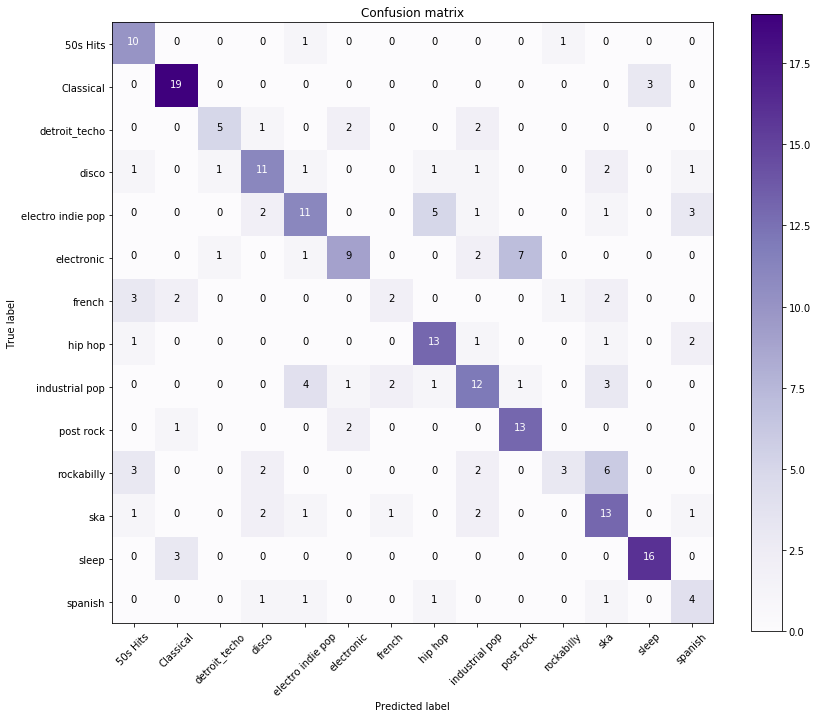

In [65]:
plot_confusion_matrix(random_forest_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

In [67]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='purple') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

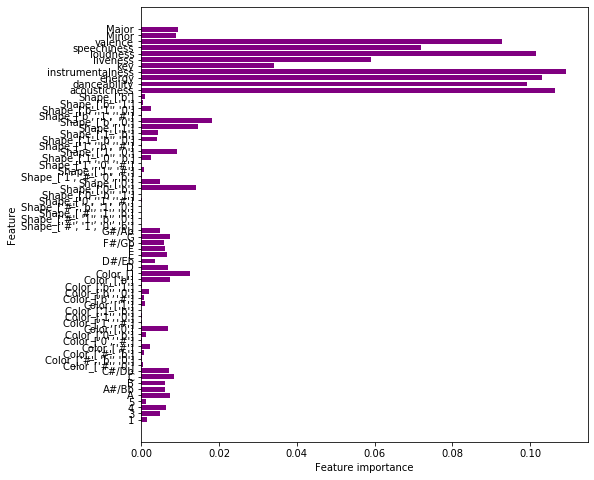

In [68]:
plot_feature_importances(forest)

In [75]:
filename = './models/Random_Forest_model_1.sav'
pickle.dump(forest, open(filename, 'wb'))

### GridSearch for Random Forest

In [128]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=10))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 60.67%


In [129]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=10)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 60.03%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


## Random Forest
### Model 2
#### Using GridSearch Parameters

In [130]:
forest = RandomForestClassifier(criterion= 'entropy', 
                                n_estimators= 100, 
                                max_depth= 60,
                                min_samples_leaf = 3
                                )
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
Random_Forest_score = forest.score(X_test, y_test)
Random_Forest_score

0.5756302521008403

In [132]:
print_metrics(y_test, preds)

Precision Score: 0.5719284529937027
Recall Score: 0.5672268907563025
Accuracy Score: 0.5672268907563025
F1 Score: 0.5576527101938331


In [133]:
preds = forest.predict(X_test)
random_forest_confusion_matrix = confusion_matrix(y_test, preds)
random_forest_classification_report = classification_report(y_test, preds)
print(random_forest_confusion_matrix)
print(random_forest_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))

[[10  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  4  1  1  4  0  0  0  0  0  0  0  0]
 [ 1  0  1 11  1  0  0  1  0  0  0  2  0  2]
 [ 0  0  0  3 10  1  0  4  2  0  0  0  0  3]
 [ 0  1  1  0  1  7  0  0  2  8  0  0  0  0]
 [ 3  2  0  0  0  0  2  0  0  0  1  2  0  0]
 [ 0  0  0  1  0  0  0 11  2  0  0  1  0  3]
 [ 0  0  0  1  2  1  2  2 13  1  0  2  0  0]
 [ 0  0  0  0  0  2  0  0  0 14  0  0  0  0]
 [ 3  0  0  1  0  0  0  0  2  0  2  8  0  0]
 [ 1  0  0  1  1  0  1  1  3  0  0 12  0  1]
 [ 0  3  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  1  0  4]]
                   precision    recall  f1-score   support

         50s Hits       0.56      0.83      0.67        12
        classical       0.78      0.95      0.86        22
    detroit_techo       0.67      0.40      0.50        10
            disco       0.55      0.58      0.56        19
electro indie pop       0.56      0.43      0.49        23
       electro

In [134]:
random_forest_results = list(zip(list(preds), list(y_test)))
random_forest_results

[('electro indie pop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('post rock', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('electro indie pop', 'electro indie pop'),
 ('industrial pop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('ska', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('sleep', 'sleep'),
 ('electronic', 'post rock'),
 ('hip hop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('hip hop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('electro indie pop', 'industrial pop'),
 ('ska', 'disco'),
 ('industrial pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('electronic', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('50s Hits', '50s Hits'),
 ('industrial pop', 'industrial pop'),
 ('electro indie pop', 'electro indie pop'),
 

Confusion Matrix, without normalization
[[10  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  4  1  1  4  0  0  0  0  0  0  0  0]
 [ 1  0  1 11  1  0  0  1  0  0  0  2  0  2]
 [ 0  0  0  3 10  1  0  4  2  0  0  0  0  3]
 [ 0  1  1  0  1  7  0  0  2  8  0  0  0  0]
 [ 3  2  0  0  0  0  2  0  0  0  1  2  0  0]
 [ 0  0  0  1  0  0  0 11  2  0  0  1  0  3]
 [ 0  0  0  1  2  1  2  2 13  1  0  2  0  0]
 [ 0  0  0  0  0  2  0  0  0 14  0  0  0  0]
 [ 3  0  0  1  0  0  0  0  2  0  2  8  0  0]
 [ 1  0  0  1  1  0  1  1  3  0  0 12  0  1]
 [ 0  3  0  0  0  0  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  1  0  4]]


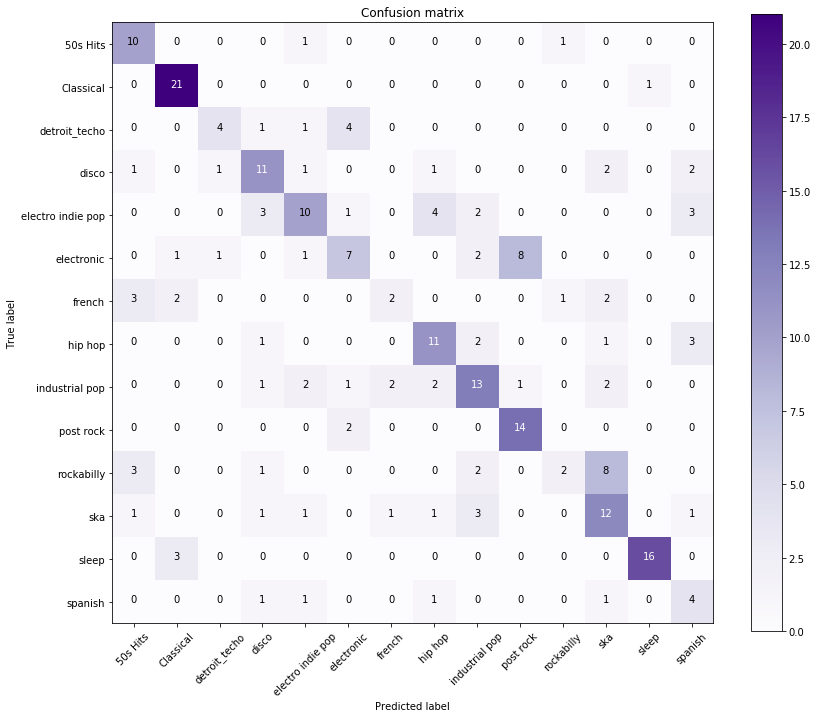

In [135]:
plot_confusion_matrix(random_forest_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

##### Next Steps
Run Models again with features that have more importance effecting classification

In [136]:
filename = './models/Random_Forest_model_2.sav'
pickle.dump(forest, open(filename, 'wb'))

## Support Vector Machine


In [114]:
# using gridsearch to find optimal parameters
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.108 (+/-0.042) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.074 (+/-0.054) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.326 (+/-0.064) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.116 (+/-0.058) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.508 (+/-0.064) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.326 (+/-0.067) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.546 (+/-0.073) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.531 (+/-0.081) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.532 (+/-0.109) for {'C': 1, 'kernel': 'linear'}
0.555 (+/-0.074) for {'C': 10, 'kernel': 'linear'}
0.522 (+/-0.077) for {'C': 100, 'kernel': 'linear'}
0.519 (+/-0.077) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full ev

## SVC
### Model 1
#### Not using Parameters from GridSearch

In [137]:
tic = time()
svclassifier = SVC(kernel='rbf', C=1.906667, degree = 6)  
svclassifier.fit(X_train, y_train) 
preds = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.1740741729736328 seconds


In [138]:
SVC_score = svclassifier.score(X_test, y_test)
SVC_score

0.3319327731092437

In [139]:
print_metrics(y_test, preds)

Precision Score: 0.33118929620745685
Recall Score: 0.3319327731092437
Accuracy Score: 0.3319327731092437
F1 Score: 0.3000767989447497


In [140]:
SVC_confusion_matrix = confusion_matrix(y_test,preds)
SVC_classification_report = classification_report(y_test,preds)
print(SVC_confusion_matrix)
print(SVC_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))
print_metrics(y_test, preds)

[[ 6  1  0  0  0  1  0  1  0  0  0  3  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 1  1  1  0  0  4  0  0  1  2  0  0  0  0]
 [ 0  0  0  1  3  5  0  3  2  1  0  3  0  1]
 [ 1  0  0  0  6  2  0  7  0  2  0  1  0  4]
 [ 0  2  0  0  1  9  0  2  1  5  0  0  0  0]
 [ 1  2  0  1  0  3  0  0  0  1  0  2  0  0]
 [ 0  0  0  1  0  1  0  5  1  0  0  7  0  3]
 [ 0  0  0  1  3  5  0  4  4  0  0  2  0  5]
 [ 0  1  0  0  0  7  0  1  1  6  0  0  0  0]
 [ 3  0  0  1  1  2  0  2  0  0  0  6  0  1]
 [ 1  0  0  0  5  0  0  1  1  0  0 10  0  3]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  2  1  0  1  0  0  0  0  0  4]]
                   precision    recall  f1-score   support

         50s Hits       0.46      0.50      0.48        12
        classical       0.52      0.59      0.55        22
    detroit_techo       1.00      0.10      0.18        10
            disco       0.20      0.05      0.08        19
electro indie pop       0.29      0.26      0.27        23
       electro

In [141]:
svc_results = list(zip(list(preds), list(y_test)))
svc_results

[('hip hop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('spanish', 'ska'),
 ('electronic', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('electro indie pop', 'electro indie pop'),
 ('hip hop', 'electro indie pop'),
 ('post rock', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('spanish', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('electronic', 'disco'),
 ('sleep', 'sleep'),
 ('electronic', 'post rock'),
 ('hip hop', 'hip hop'),
 ('ska', 'ska'),
 ('electronic', 'disco'),
 ('disco', 'industrial pop'),
 ('electronic', 'detroit_techo'),
 ('hip hop', 'industrial pop'),
 ('electro indie pop', 'disco'),
 ('hip hop', 'electro indie pop'),
 ('ska', 'rockabilly'),
 ('classical', 'classical'),
 ('post rock', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('electronic', '50s Hits'),
 ('spanish', 'industrial pop'),
 ('hip hop', 'electro indie pop'),
 ('electro indie pop', 'ska'),
 ('

Confusion Matrix, without normalization
[[ 6  1  0  0  0  1  0  1  0  0  0  3  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  9  0]
 [ 1  1  1  0  0  4  0  0  1  2  0  0  0  0]
 [ 0  0  0  1  3  5  0  3  2  1  0  3  0  1]
 [ 1  0  0  0  6  2  0  7  0  2  0  1  0  4]
 [ 0  2  0  0  1  9  0  2  1  5  0  0  0  0]
 [ 1  2  0  1  0  3  0  0  0  1  0  2  0  0]
 [ 0  0  0  1  0  1  0  5  1  0  0  7  0  3]
 [ 0  0  0  1  3  5  0  4  4  0  0  2  0  5]
 [ 0  1  0  0  0  7  0  1  1  6  0  0  0  0]
 [ 3  0  0  1  1  2  0  2  0  0  0  6  0  1]
 [ 1  0  0  0  5  0  0  1  1  0  0 10  0  3]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  2  1  0  1  0  0  0  0  0  4]]


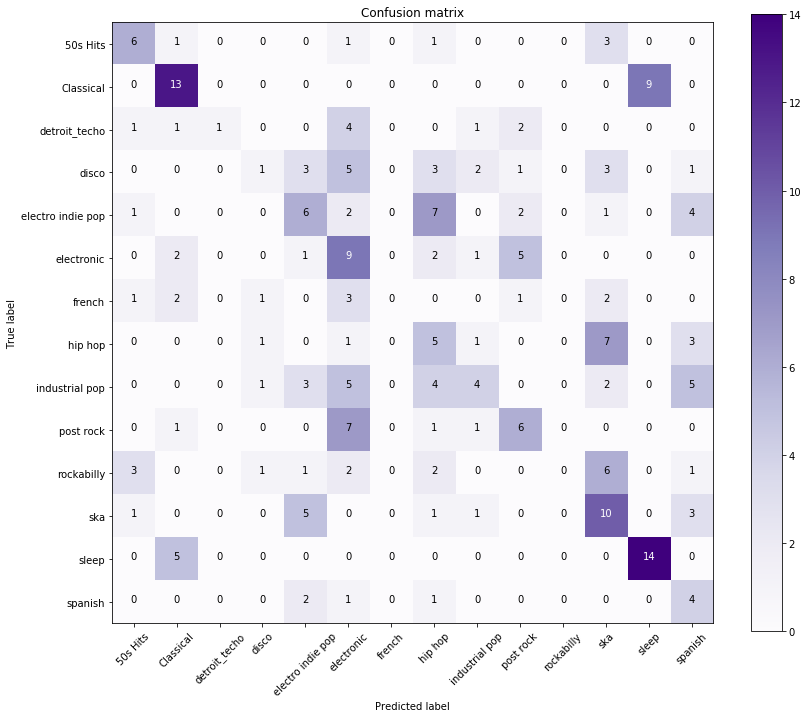

In [142]:
plot_confusion_matrix(SVC_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

In [143]:
filename = './models/SVC_model_1.sav'
pickle.dump(svclassifier, open(filename, 'wb'))

## SVC
### Model 2
#### Using Parameters from GridSearch

In [144]:
tic = time()
svclassifier = SVC(kernel='linear', C=10)  
svclassifier.fit(X_train, y_train) 
preds = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.43593788146972656 seconds


In [145]:
SVC_score = svclassifier.score(X_test, y_test)
SVC_score

0.5672268907563025

In [146]:
print_metrics(y_test, preds)

Precision Score: 0.5719284529937027
Recall Score: 0.5672268907563025
Accuracy Score: 0.5672268907563025
F1 Score: 0.5576527101938331


In [147]:
SVC_confusion_matrix = confusion_matrix(y_test,preds)
SVC_classification_report = classification_report(y_test,preds)
print(SVC_confusion_matrix)
print(SVC_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))

[[ 9  0  0  0  0  0  1  1  0  0  1  0  0  0]
 [ 0 16  0  0  0  0  1  0  0  0  0  0  5  0]
 [ 0  0  7  2  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1 12  2  1  0  1  0  0  0  2  0  0]
 [ 0  0  0  0 16  0  1  1  1  0  0  2  0  2]
 [ 0  1  2  0  1  8  0  1  1  6  0  0  0  0]
 [ 2  1  0  0  0  0  4  0  1  0  2  0  0  0]
 [ 1  0  0  0  2  0  0  9  3  0  0  3  0  0]
 [ 0  0  1  1  7  1  0  0 12  0  0  2  0  0]
 [ 0  2  0  0  0  3  0  0  0 11  0  0  0  0]
 [ 3  0  0  2  2  0  0  0  2  0  3  4  0  0]
 [ 1  0  0  3  2  0  1  0  3  0  0 11  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  2  0  3]]
                   precision    recall  f1-score   support

         50s Hits       0.56      0.75      0.64        12
        classical       0.64      0.73      0.68        22
    detroit_techo       0.64      0.70      0.67        10
            disco       0.57      0.63      0.60        19
electro indie pop       0.48      0.70      0.57        23
       electro

In [148]:
svc_results = list(zip(list(preds), list(y_test)))
svc_results

[('electro indie pop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('post rock', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('electro indie pop', 'electro indie pop'),
 ('hip hop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('ska', 'spanish'),
 ('ska', 'industrial pop'),
 ('ska', 'disco'),
 ('french', 'classical'),
 ('disco', 'disco'),
 ('classical', 'sleep'),
 ('classical', 'post rock'),
 ('electro indie pop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('electro indie pop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('industrial pop', 'industrial pop'),
 ('disco', 'disco'),
 ('electro indie pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('electro indie pop', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('french', '50s Hits'),
 ('industrial pop', 'industrial pop'),
 ('electro indie pop', 'electr

Confusion Matrix, without normalization
[[ 9  0  0  0  0  0  1  1  0  0  1  0  0  0]
 [ 0 16  0  0  0  0  1  0  0  0  0  0  5  0]
 [ 0  0  7  2  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1 12  2  1  0  1  0  0  0  2  0  0]
 [ 0  0  0  0 16  0  1  1  1  0  0  2  0  2]
 [ 0  1  2  0  1  8  0  1  1  6  0  0  0  0]
 [ 2  1  0  0  0  0  4  0  1  0  2  0  0  0]
 [ 1  0  0  0  2  0  0  9  3  0  0  3  0  0]
 [ 0  0  1  1  7  1  0  0 12  0  0  2  0  0]
 [ 0  2  0  0  0  3  0  0  0 11  0  0  0  0]
 [ 3  0  0  2  2  0  0  0  2  0  3  4  0  0]
 [ 1  0  0  3  2  0  1  0  3  0  0 11  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  2  0  3]]


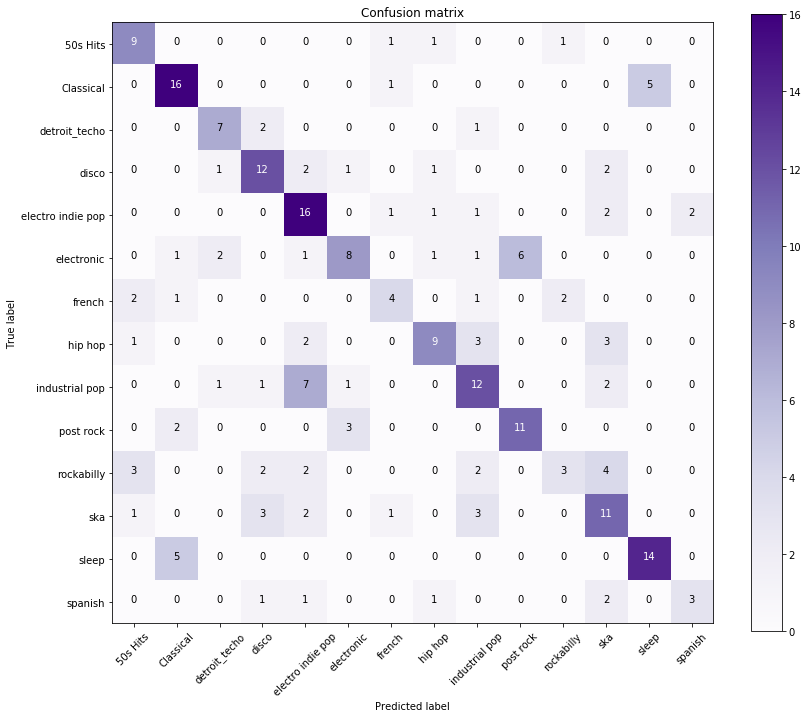

In [149]:
plot_confusion_matrix(SVC_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

In [150]:
filename = './models/SVC_model_2.sav'
pickle.dump(svclassifier, open(filename, 'wb'))

## Logistical Regression
### Model 1
#### Not Using GridSearch 

In [151]:
logreg = LogisticRegression().fit(X_train,y_train)
logreg.score(X_test, y_test, sample_weight=None)

0.5714285714285714

In [155]:
preds = logreg.predict(X_test)
logreg_confusion_matrix = confusion_matrix(y_test,preds)
logreg_classification_report = classification_report(y_test,preds)
print(logreg_confusion_matrix)
print(logreg_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))

[[10  0  0  0  0  0  1  1  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  4  1  0  4  0  0  1  0  0  0  0  0]
 [ 1  0  0 14  0  1  0  0  1  0  0  1  0  1]
 [ 0  0  0  0 14  0  2  1  2  0  0  1  0  3]
 [ 0  0  1  0  2  8  0  1  0  8  0  0  0  0]
 [ 2  2  0  0  0  0  4  0  1  0  1  0  0  0]
 [ 1  0  0  1  3  0  0  9  3  0  0  1  0  0]
 [ 0  0  1  1  8  1  1  0 10  0  0  0  0  2]
 [ 0  1  0  0  0  2  0  0  0 13  0  0  0  0]
 [ 2  0  0  3  1  0  0  0  3  0  2  5  0  0]
 [ 1  0  0  1  2  0  1  1  3  0  0 11  0  1]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  1  0  1  1  0  0  0  1  0  4]]
                   precision    recall  f1-score   support

         50s Hits       0.59      0.83      0.69        12
        classical       0.72      0.82      0.77        22
    detroit_techo       0.67      0.40      0.50        10
            disco       0.67      0.74      0.70        19
electro indie pop       0.45      0.61      0.52        23
       electro

In [156]:
logreg_results = list(zip(list(preds), list(y_test)))
logreg_results

[('electro indie pop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('post rock', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('electro indie pop', 'electro indie pop'),
 ('hip hop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('spanish', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('classical', 'sleep'),
 ('post rock', 'post rock'),
 ('electro indie pop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('electro indie pop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('electro indie pop', 'industrial pop'),
 ('disco', 'disco'),
 ('industrial pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('electro indie pop', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('french', '50s Hits'),
 ('spanish', 'industrial pop'),
 ('electro indie pop', 'el

Confusion Matrix, without normalization
[[10  0  0  0  0  0  1  1  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  4  1  0  4  0  0  1  0  0  0  0  0]
 [ 1  0  0 14  0  1  0  0  1  0  0  1  0  1]
 [ 0  0  0  0 14  0  2  1  2  0  0  1  0  3]
 [ 0  0  1  0  2  8  0  1  0  8  0  0  0  0]
 [ 2  2  0  0  0  0  4  0  1  0  1  0  0  0]
 [ 1  0  0  1  3  0  0  9  3  0  0  1  0  0]
 [ 0  0  1  1  8  1  1  0 10  0  0  0  0  2]
 [ 0  1  0  0  0  2  0  0  0 13  0  0  0  0]
 [ 2  0  0  3  1  0  0  0  3  0  2  5  0  0]
 [ 1  0  0  1  2  0  1  1  3  0  0 11  0  1]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  1  0  1  1  0  0  0  1  0  4]]


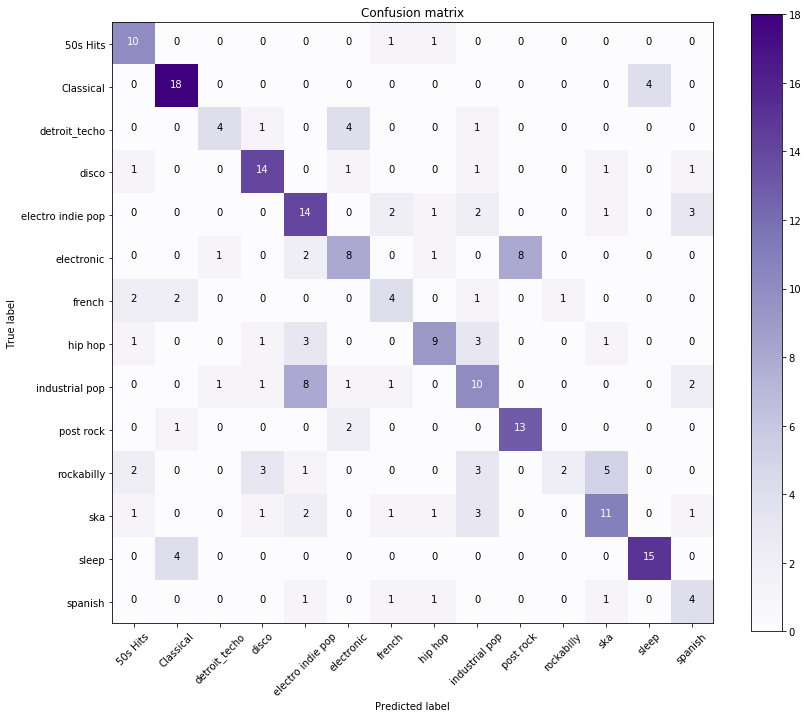

In [157]:
plot_confusion_matrix(logreg_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

In [177]:
filename = './models/logreg_1.sav'
pickle.dump(logreg, open(filename, 'wb'))

## GridSearch for Logistical Regresion

In [189]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  solver=solver)

grid = GridSearchCV(estimator=logreg,
                    param_grid=param_grid,
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s


Best Score:  0.5622834864940127
Best Params:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   37.9s finished


## Logistical Regression
### Model 2
#### Using GridSearch Parameters

In [188]:
logreg_1 = LogisticRegression(C = 1, 
                              penalty = 'l1', 
                              solver= 'liblinear')
logreg_1.fit(X_train, y_train)
pred = logreg_1.predict(X_test)
logreg_1_confusion_matrix = confusion_matrix(y_test,preds)
logreg_1_classification_report = classification_report(y_test,preds)
print(logreg_confusion_matrix)
print(logreg_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))

[[10  0  0  0  0  0  1  1  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  4  1  0  4  0  0  1  0  0  0  0  0]
 [ 1  0  0 14  0  1  0  0  1  0  0  1  0  1]
 [ 0  0  0  0 14  0  2  1  2  0  0  1  0  3]
 [ 0  0  1  0  2  8  0  1  0  8  0  0  0  0]
 [ 2  2  0  0  0  0  4  0  1  0  1  0  0  0]
 [ 1  0  0  1  3  0  0  9  3  0  0  1  0  0]
 [ 0  0  1  1  8  1  1  0 10  0  0  0  0  2]
 [ 0  1  0  0  0  2  0  0  0 13  0  0  0  0]
 [ 2  0  0  3  1  0  0  0  3  0  2  5  0  0]
 [ 1  0  0  1  2  0  1  1  3  0  0 11  0  1]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  1  0  1  1  0  0  0  1  0  4]]
                   precision    recall  f1-score   support

         50s Hits       0.59      0.83      0.69        12
        classical       0.72      0.82      0.77        22
    detroit_techo       0.67      0.40      0.50        10
            disco       0.67      0.74      0.70        19
electro indie pop       0.45      0.61      0.52        23
       electro

In [190]:
logreg_1_results = list(zip(list(preds), list(y_test)))
logreg_1_results

[('electro indie pop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('post rock', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('electro indie pop', 'electro indie pop'),
 ('hip hop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('spanish', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('classical', 'sleep'),
 ('post rock', 'post rock'),
 ('electro indie pop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('electro indie pop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('electro indie pop', 'industrial pop'),
 ('disco', 'disco'),
 ('industrial pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('electro indie pop', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('french', '50s Hits'),
 ('spanish', 'industrial pop'),
 ('electro indie pop', 'el

Confusion Matrix, without normalization
[[10  0  0  0  0  0  1  1  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  4  0]
 [ 0  0  4  1  0  4  0  0  1  0  0  0  0  0]
 [ 1  0  0 14  0  1  0  0  1  0  0  1  0  1]
 [ 0  0  0  0 14  0  2  1  2  0  0  1  0  3]
 [ 0  0  1  0  2  8  0  1  0  8  0  0  0  0]
 [ 2  2  0  0  0  0  4  0  1  0  1  0  0  0]
 [ 1  0  0  1  3  0  0  9  3  0  0  1  0  0]
 [ 0  0  1  1  8  1  1  0 10  0  0  0  0  2]
 [ 0  1  0  0  0  2  0  0  0 13  0  0  0  0]
 [ 2  0  0  3  1  0  0  0  3  0  2  5  0  0]
 [ 1  0  0  1  2  0  1  1  3  0  0 11  0  1]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  1  0  1  1  0  0  0  1  0  4]]


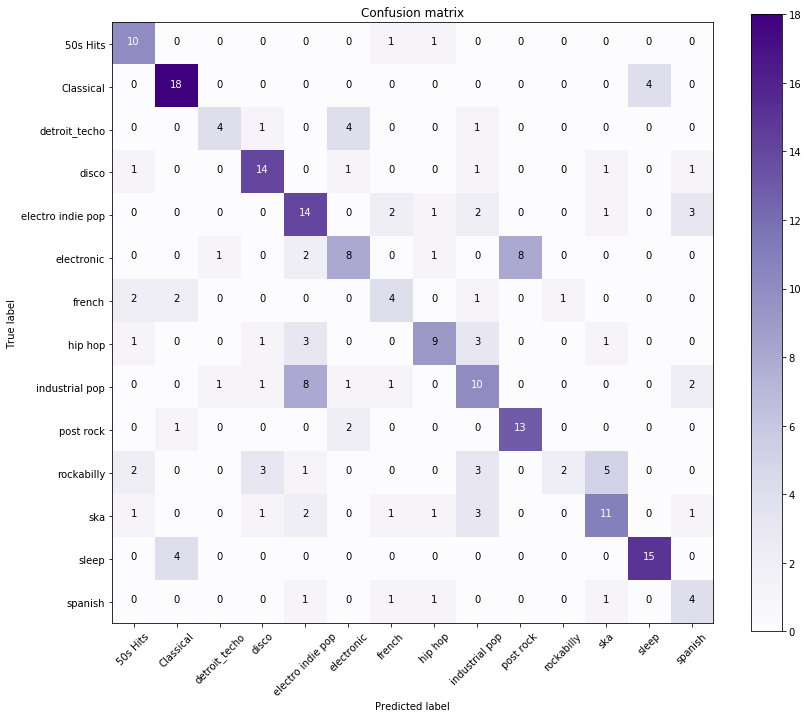

In [191]:
plot_confusion_matrix(logreg_1_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples)

In [192]:
filename = './models/logreg_2.sav'
pickle.dump(logreg_1, open(filename, 'wb'))

## Removing Features
##### (Removing all features I did not Engineer for comparison)

In [193]:
df = pd.read_csv('./genre_csv/all_genre_CSV')

In [194]:
df.columns

Index(['1', '3', '4', '5', 'A', 'A#/Bb', 'B', 'C', 'C#/Db', 'Color_['#', '0']',
       'Color_['#', 'b', '0']', 'Color_['#', 'b']', 'Color_['#']',
       'Color_['0', '#']', 'Color_['0', 'b']', 'Color_['0']',
       'Color_['1', '#']', 'Color_['1', '0']', 'Color_['1', 'b']',
       'Color_['1']', 'Color_['b', '#']', 'Color_['b', '0']',
       'Color_['b', '1']', 'Color_['b']', 'Color_[]', 'D', 'D#/Eb', 'E', 'F',
       'F#/Gb', 'G', 'G#/Ab', 'Genre', 'Shape_['#', '1', '0', 'b']',
       'Shape_['#', '1', 'b', '0']', 'Shape_['#', '1', 'b']',
       'Shape_['#', 'b', '1', '0']', 'Shape_['0', '1', '#']',
       'Shape_['0', 'b', '1']', 'Shape_['0', 'b']', 'Shape_['0']',
       'Shape_['1', '#', '0', 'b']', 'Shape_['1', '#']',
       'Shape_['1', '0', '#']', 'Shape_['1', '0', 'b']', 'Shape_['1', '0']',
       'Shape_['1', 'b', '#']', 'Shape_['1', 'b', '0']', 'Shape_['1', 'b']',
       'Shape_['1']', 'Shape_['b', '0']', 'Shape_['b', '1', '#']',
       'Shape_['b', '1', '0']', 'Shape_['b', '

In [195]:
# here we remove all features that have less impact 
X = df[['acousticness', 
        'danceability', 
        'energy', 
        'instrumentalness', 
        'liveness',
        'loudness',
        'speechiness',
        'valence',
        'Minor', 
        'Major']]
y = df['Genre']

## Train Test Split

In [196]:
# using standard scaler to scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
df = pd.DataFrame(X, columns=X.columns)
# training/test
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

## Base Model with less features

In [197]:
dummies_clf = DummyClassifier()
dummies_clf.fit(X_train, y_train)
preds = dummies_clf.predict(X_test)
base_confusion_matrix = confusion_matrix(y_test, preds)
base_classification_report = classification_report(y_test, preds)
print(base_confusion_matrix)
print(base_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))

[[1 1 0 0 0 2 0 2 1 2 2 0 0 1]
 [1 1 1 3 1 3 0 2 0 4 1 4 1 0]
 [0 0 0 0 0 1 0 1 2 3 1 2 0 0]
 [1 1 0 0 2 1 4 2 2 4 0 0 2 0]
 [3 0 1 2 4 1 0 1 1 1 4 1 2 2]
 [1 2 0 2 2 1 1 2 1 1 1 3 1 2]
 [0 2 0 0 1 0 1 1 0 0 0 2 1 2]
 [4 0 0 1 2 2 1 1 1 2 0 2 2 0]
 [0 3 0 2 3 2 1 1 3 1 2 0 3 3]
 [0 1 0 0 1 2 1 0 2 0 1 1 5 2]
 [1 1 2 2 0 1 0 2 1 0 3 1 0 2]
 [2 2 1 1 3 0 1 1 2 2 1 5 0 0]
 [2 2 2 0 0 4 0 0 5 1 0 1 2 0]
 [0 2 1 0 0 1 0 0 2 0 1 0 1 0]]
                   precision    recall  f1-score   support

         50s Hits       0.06      0.08      0.07        12
        classical       0.06      0.05      0.05        22
    detroit_techo       0.00      0.00      0.00        10
            disco       0.00      0.00      0.00        19
electro indie pop       0.21      0.17      0.19        23
       electronic       0.05      0.05      0.05        20
           french       0.10      0.10      0.10        10
          hip hop       0.06      0.06      0.06        18
   industrial pop       0.13     

In [198]:
base_model_results = list(zip(list(preds), list(y_test)))
base_model_results

[('rockabilly', 'electro indie pop'),
 ('electro indie pop', 'ska'),
 ('detroit_techo', 'spanish'),
 ('hip hop', 'classical'),
 ('ska', 'ska'),
 ('ska', 'electronic'),
 ('electronic', 'sleep'),
 ('detroit_techo', 'ska'),
 ('electronic', 'electro indie pop'),
 ('spanish', 'electro indie pop'),
 ('industrial pop', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('classical', 'spanish'),
 ('disco', 'industrial pop'),
 ('hip hop', 'disco'),
 ('disco', 'classical'),
 ('electro indie pop', 'disco'),
 ('classical', 'sleep'),
 ('industrial pop', 'post rock'),
 ('50s Hits', 'hip hop'),
 ('ska', 'ska'),
 ('electro indie pop', 'disco'),
 ('hip hop', 'industrial pop'),
 ('ska', 'detroit_techo'),
 ('electronic', 'industrial pop'),
 ('industrial pop', 'disco'),
 ('electro indie pop', 'electro indie pop'),
 ('disco', 'rockabilly'),
 ('disco', 'classical'),
 ('50s Hits', 'electro indie pop'),
 ('french', 'electronic'),
 ('post rock', '50s Hits'),
 ('sleep', 'industrial pop'),
 ('industrial pop', 'electro indi

Confusion Matrix, without normalization
[[1 1 0 0 0 2 0 2 1 2 2 0 0 1]
 [1 1 1 3 1 3 0 2 0 4 1 4 1 0]
 [0 0 0 0 0 1 0 1 2 3 1 2 0 0]
 [1 1 0 0 2 1 4 2 2 4 0 0 2 0]
 [3 0 1 2 4 1 0 1 1 1 4 1 2 2]
 [1 2 0 2 2 1 1 2 1 1 1 3 1 2]
 [0 2 0 0 1 0 1 1 0 0 0 2 1 2]
 [4 0 0 1 2 2 1 1 1 2 0 2 2 0]
 [0 3 0 2 3 2 1 1 3 1 2 0 3 3]
 [0 1 0 0 1 2 1 0 2 0 1 1 5 2]
 [1 1 2 2 0 1 0 2 1 0 3 1 0 2]
 [2 2 1 1 3 0 1 1 2 2 1 5 0 0]
 [2 2 2 0 0 4 0 0 5 1 0 1 2 0]
 [0 2 1 0 0 1 0 0 2 0 1 0 1 0]]


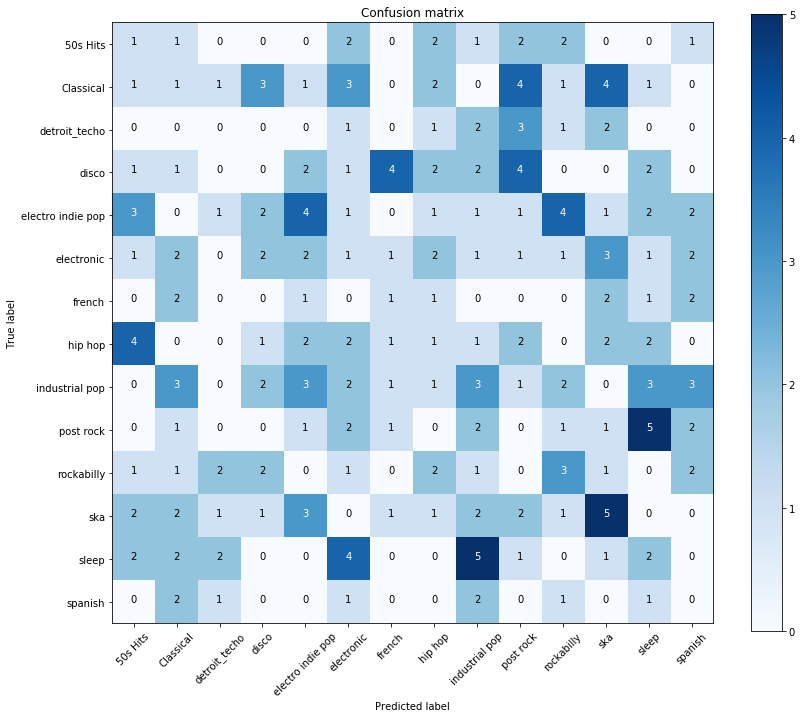

In [199]:
plot_confusion_matrix(base_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## KNN with less features

In [252]:
# retriving best K value
k = find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25)

Best Value for k: 1
F1-Score: 0.3907563025210084


In [253]:
k

1

In [201]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [202]:
KNN_confusion_matrix = confusion_matrix(y_test, preds)
KNN_classification_report = classification_report(y_test, preds)
print(KNN_confusion_matrix)
print(KNN_classification_report)
print_metrics(y_test, preds)

[[ 8  0  0  1  0  0  1  1  0  0  0  1  0  0]
 [ 0 14  0  0  0  0  0  0  0  2  0  0  6  0]
 [ 1  0  5  0  0  2  0  0  0  1  0  1  0  0]
 [ 0  0  0 12  1  1  0  1  2  0  1  0  0  1]
 [ 0  0  0  4  4  2  1  8  1  0  0  1  0  2]
 [ 0  1  5  1  3  7  0  0  0  3  0  0  0  0]
 [ 2  2  0  1  0  0  1  2  0  1  1  0  0  0]
 [ 1  0  0  3  3  0  0  6  2  0  0  1  0  2]
 [ 1  0  1  1  3  2  0  5  7  1  1  1  0  1]
 [ 0  1  0  0  0  6  0  0  0  9  0  0  0  0]
 [ 3  0  0  2  1  0  1  0  4  0  0  3  0  2]
 [ 1  0  0  3  3  0  0  1  5  0  3  5  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0 12  0]
 [ 1  0  0  1  1  0  0  0  1  0  0  1  0  3]]
                   precision    recall  f1-score   support

         50s Hits       0.44      0.67      0.53        12
        classical       0.56      0.64      0.60        22
    detroit_techo       0.45      0.50      0.48        10
            disco       0.41      0.63      0.50        19
electro indie pop       0.21      0.17      0.19        23
       electro

In [203]:
KNN_results = list(zip(list(preds), list(y_test)))
KNN_results

[('hip hop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('rockabilly', 'ska'),
 ('electronic', 'electronic'),
 ('sleep', 'sleep'),
 ('rockabilly', 'ska'),
 ('disco', 'electro indie pop'),
 ('hip hop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('spanish', 'industrial pop'),
 ('disco', 'disco'),
 ('post rock', 'classical'),
 ('disco', 'disco'),
 ('classical', 'sleep'),
 ('post rock', 'post rock'),
 ('industrial pop', 'hip hop'),
 ('industrial pop', 'ska'),
 ('disco', 'disco'),
 ('hip hop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('electro indie pop', 'industrial pop'),
 ('rockabilly', 'disco'),
 ('hip hop', 'electro indie pop'),
 ('spanish', 'rockabilly'),
 ('classical', 'classical'),
 ('hip hop', 'electro indie pop'),
 ('electronic', 'electronic'),
 ('french', '50s Hits'),
 ('rockabilly', 'industrial pop'),
 ('disco', 'electro indie pop'),
 ('ska', 'sk

Confusion Matrix, without normalization
[[ 8  0  0  1  0  0  1  1  0  0  0  1  0  0]
 [ 0 14  0  0  0  0  0  0  0  2  0  0  6  0]
 [ 1  0  5  0  0  2  0  0  0  1  0  1  0  0]
 [ 0  0  0 12  1  1  0  1  2  0  1  0  0  1]
 [ 0  0  0  4  4  2  1  8  1  0  0  1  0  2]
 [ 0  1  5  1  3  7  0  0  0  3  0  0  0  0]
 [ 2  2  0  1  0  0  1  2  0  1  1  0  0  0]
 [ 1  0  0  3  3  0  0  6  2  0  0  1  0  2]
 [ 1  0  1  1  3  2  0  5  7  1  1  1  0  1]
 [ 0  1  0  0  0  6  0  0  0  9  0  0  0  0]
 [ 3  0  0  2  1  0  1  0  4  0  0  3  0  2]
 [ 1  0  0  3  3  0  0  1  5  0  3  5  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0 12  0]
 [ 1  0  0  1  1  0  0  0  1  0  0  1  0  3]]


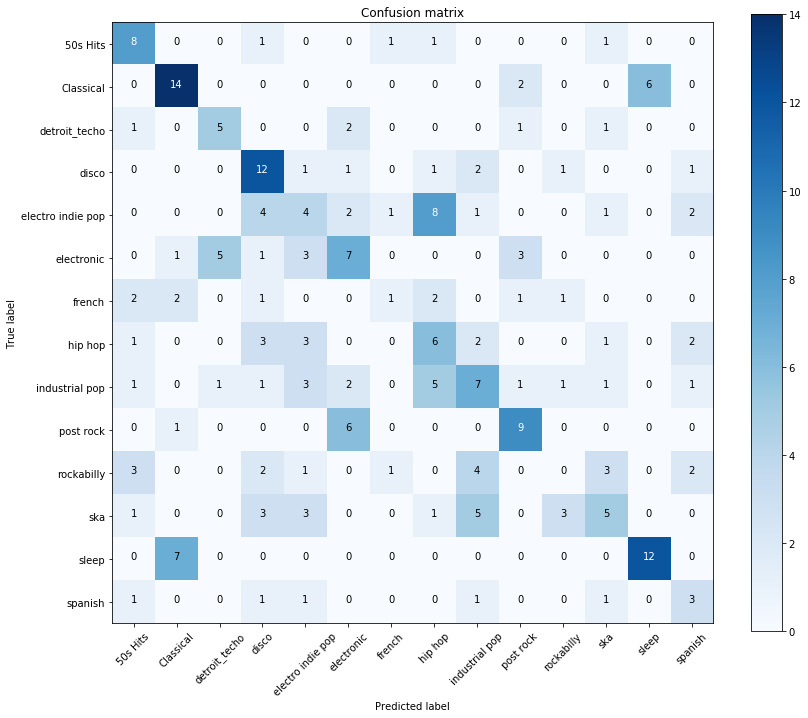

In [204]:
plot_confusion_matrix(KNN_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [205]:
# saving second KNN model
filename = './models/KNN_model_2.sav'
pickle.dump(knn, open(filename, 'wb'))

## Random Forest with less features
### Model 1
#### Not Using GridSearch Parameters

In [206]:
forest = RandomForestClassifier(n_estimators=300, max_depth= 60)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [207]:
Random_Forest_score = forest.score(X_test, y_test)
Random_Forest_score

0.5672268907563025

In [208]:
preds = forest.predict(X_test)
random_forest_confusion_matrix = confusion_matrix(y_test, preds)
random_forest_classification_report = classification_report(y_test, preds)
print(random_forest_confusion_matrix)
print(random_forest_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))
print_metrics(y_test, preds)

[[ 8  0  0  0  0  0  2  0  0  0  2  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  5  1  0  3  0  0  1  0  0  0  0  0]
 [ 0  0  0 15  1  0  0  1  0  0  0  1  0  1]
 [ 0  0  0  3 11  0  1  4  1  0  0  0  0  3]
 [ 0  0  2  0  1  6  0  0  2  9  0  0  0  0]
 [ 2  2  0  0  0  0  3  1  0  0  1  1  0  0]
 [ 1  0  0  0  1  0  1 10  1  0  0  1  0  3]
 [ 0  0  1  1  1  0  1  3 13  1  0  3  0  0]
 [ 0  1  0  0  0  3  0  0  0 12  0  0  0  0]
 [ 3  0  0  2  0  0  0  0  1  0  2  8  0  0]
 [ 1  0  0  2  1  0  1  0  2  0  0 13  0  1]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  0  0  5]]
                   precision    recall  f1-score   support

         50s Hits       0.53      0.67      0.59        12
        classical       0.71      0.77      0.74        22
    detroit_techo       0.62      0.50      0.56        10
            disco       0.60      0.79      0.68        19
electro indie pop       0.65      0.48      0.55        23
       electro

In [209]:
random_forest_results = list(zip(list(preds), list(y_test)))
random_forest_results

[('electro indie pop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('electronic', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('disco', 'electro indie pop'),
 ('industrial pop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('ska', 'industrial pop'),
 ('disco', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('sleep', 'sleep'),
 ('electronic', 'post rock'),
 ('french', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('industrial pop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('industrial pop', 'industrial pop'),
 ('ska', 'disco'),
 ('electro indie pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('electro indie pop', 'electro indie pop'),
 ('post rock', 'electronic'),
 ('french', '50s Hits'),
 ('industrial pop', 'industrial pop'),
 ('electro indie pop', 'electro indie pop'),


Confusion Matrix, without normalization
[[ 8  0  0  0  0  0  2  0  0  0  2  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  5  1  0  3  0  0  1  0  0  0  0  0]
 [ 0  0  0 15  1  0  0  1  0  0  0  1  0  1]
 [ 0  0  0  3 11  0  1  4  1  0  0  0  0  3]
 [ 0  0  2  0  1  6  0  0  2  9  0  0  0  0]
 [ 2  2  0  0  0  0  3  1  0  0  1  1  0  0]
 [ 1  0  0  0  1  0  1 10  1  0  0  1  0  3]
 [ 0  0  1  1  1  0  1  3 13  1  0  3  0  0]
 [ 0  1  0  0  0  3  0  0  0 12  0  0  0  0]
 [ 3  0  0  2  0  0  0  0  1  0  2  8  0  0]
 [ 1  0  0  2  1  0  1  0  2  0  0 13  0  1]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  0  0  5]]


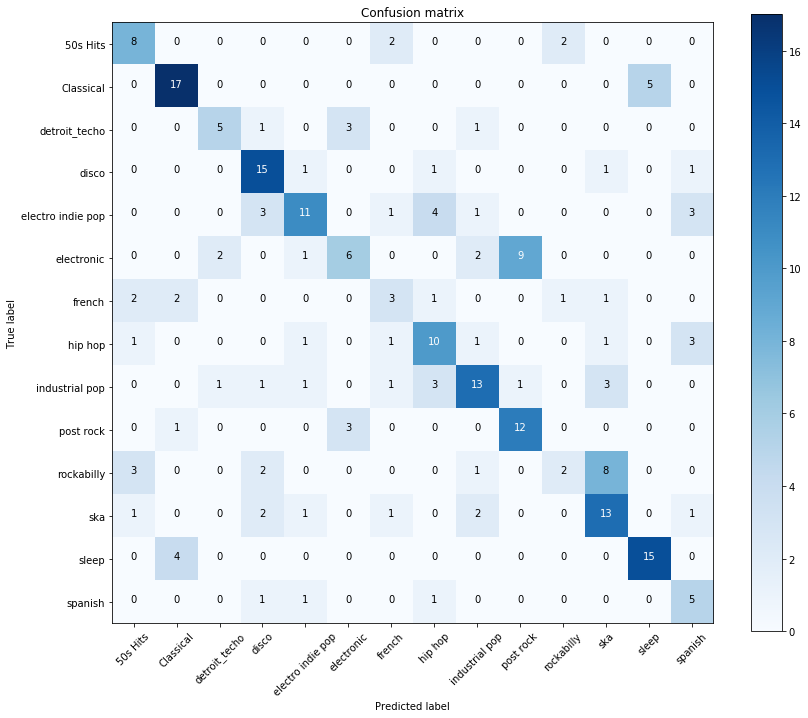

In [210]:
plot_confusion_matrix(random_forest_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

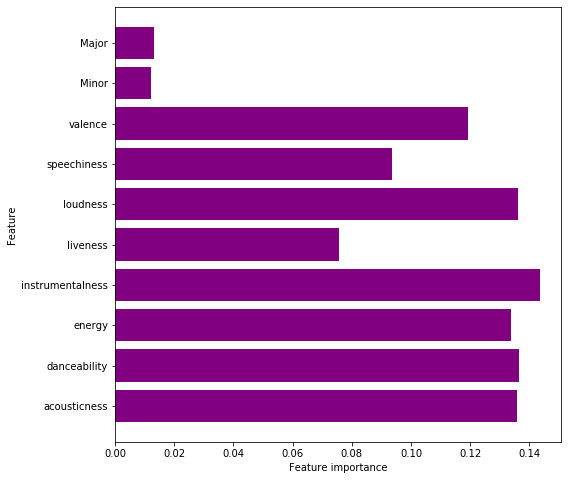

In [211]:
plot_feature_importances(forest)

In [212]:
filename = './models/Random_Forest_model_3.sav'
pickle.dump(forest, open(filename, 'wb'))

### GridSearch for Random Forest with less features

In [254]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=10))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 56.02%


In [255]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=10)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 59.08%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [257]:
params = rf_grid_search.best_params_
params.get('criterion')

'entropy'

## Random Forest with less features
### Model 2
#### Using GridSearch Parameters

In [215]:
forest = RandomForestClassifier(criterion= 'entropy', 
                                n_estimators= 100, 
                                max_depth= None,
                                min_samples_leaf= 3
                                )
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [216]:
Random_Forest_score = forest.score(X_test, y_test)
Random_Forest_score

0.5672268907563025

In [217]:
preds = forest.predict(X_test)
random_forest_confusion_matrix = confusion_matrix(y_test, preds)
random_forest_classification_report = classification_report(y_test, preds)
print(random_forest_confusion_matrix)
print(random_forest_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))
print_metrics(y_test, preds)

[[10  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  6  1  1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  1  0  0  1  0  0  0  1  0  1]
 [ 0  0  0  3 10  0  1  5  0  0  0  1  0  3]
 [ 0  1  1  0  1  7  0  0  2  8  0  0  0  0]
 [ 5  1  0  0  0  0  2  0  0  1  0  1  0  0]
 [ 1  0  0  0  2  0  0 10  3  0  0  1  0  1]
 [ 0  0  0  1  2  1  1  2 12  2  0  3  0  0]
 [ 0  0  0  0  0  3  0  0  0 13  0  0  0  0]
 [ 3  0  0  2  0  0  0  0  1  0  2  8  0  0]
 [ 1  0  0  3  1  0  0  0  3  0  0 12  0  1]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  0  0  5]]
                   precision    recall  f1-score   support

         50s Hits       0.50      0.83      0.62        12
        classical       0.73      0.73      0.73        22
    detroit_techo       0.86      0.60      0.71        10
            disco       0.58      0.79      0.67        19
electro indie pop       0.53      0.43      0.48        23
       electro

In [218]:
random_forest_results = list(zip(list(preds), list(y_test)))
random_forest_results

[('electro indie pop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('electronic', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('disco', 'electro indie pop'),
 ('hip hop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('ska', 'industrial pop'),
 ('disco', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('sleep', 'sleep'),
 ('electronic', 'post rock'),
 ('hip hop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('hip hop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('electro indie pop', 'industrial pop'),
 ('ska', 'disco'),
 ('electro indie pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('electro indie pop', 'electro indie pop'),
 ('post rock', 'electronic'),
 ('french', '50s Hits'),
 ('industrial pop', 'industrial pop'),
 ('electro indie pop', 'electro indie pop'),
 ('industr

Confusion Matrix, without normalization
[[10  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  6  1  1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  1  0  0  1  0  0  0  1  0  1]
 [ 0  0  0  3 10  0  1  5  0  0  0  1  0  3]
 [ 0  1  1  0  1  7  0  0  2  8  0  0  0  0]
 [ 5  1  0  0  0  0  2  0  0  1  0  1  0  0]
 [ 1  0  0  0  2  0  0 10  3  0  0  1  0  1]
 [ 0  0  0  1  2  1  1  2 12  2  0  3  0  0]
 [ 0  0  0  0  0  3  0  0  0 13  0  0  0  0]
 [ 3  0  0  2  0  0  0  0  1  0  2  8  0  0]
 [ 1  0  0  3  1  0  0  0  3  0  0 12  0  1]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  1  1  0  0  1  0  0  0  0  0  5]]


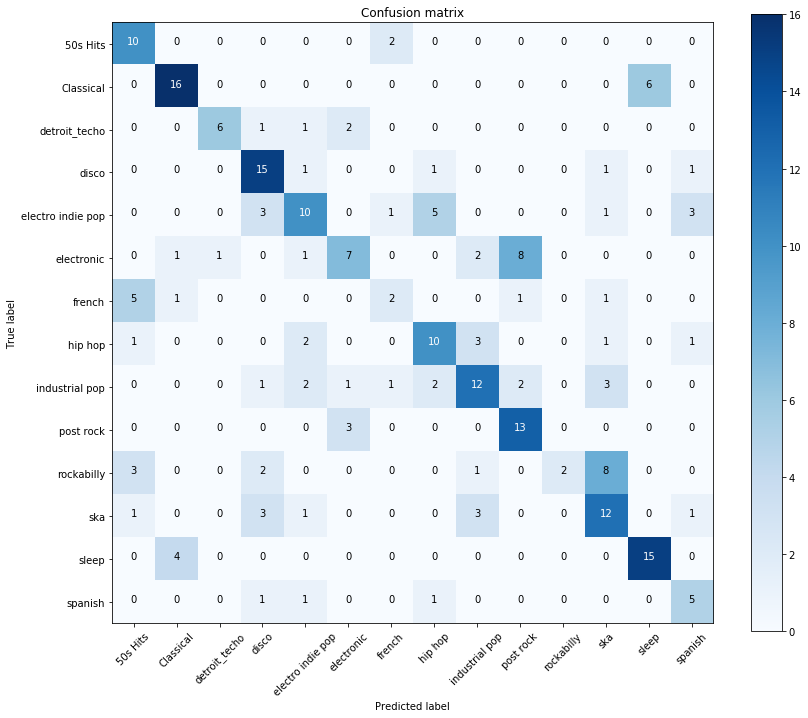

In [219]:
plot_confusion_matrix(random_forest_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [220]:
filename = './models/Random_Forest_model_4.sav'
pickle.dump(forest, open(filename, 'wb'))

## Support Vector Machine with less features

In [221]:
# using gridsearch to find optimal parameters
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

Grid scores on development set:

0.116 (+/-0.048) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.059 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.250 (+/-0.105) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.108 (+/-0.042) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.485 (+/-0.079) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.245 (+/-0.101) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.570 (+/-0.064) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.503 (+/-0.098) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.573 (+/-0.062) for {'C': 1, 'kernel': 'linear'}
0.580 (+/-0.069) for {'C': 10, 'kernel': 'linear'}
0.580 (+/-0.023) for {'C': 100, 'kernel': 'linear'}
0.573 (+/-0.034) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full e

## SVC with less features
### Model 1
#### Not using Parameters from GridSearch

In [222]:
tic = time()
svclassifier = SVC(kernel='linear', C=10)  
svclassifier.fit(X_train, y_train) 
preds = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.17318511009216309 seconds


In [223]:
SVC_score = svclassifier.score(X_test, y_test)
SVC_score

0.5672268907563025

In [224]:
SVC_confusion_matrix = confusion_matrix(y_test,preds)
SVC_classification_report = classification_report(y_test,preds)
print(SVC_confusion_matrix)
print(SVC_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))
print_metrics(y_test, preds)

[[ 9  0  0  0  0  0  2  0  0  0  1  0  0  0]
 [ 0 16  0  0  0  0  1  0  0  0  0  0  5  0]
 [ 0  0  7  2  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  2 12  2  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  2 10  0  1  6  1  0  0  1  0  2]
 [ 0  1  1  0  1  6  0  1  1  9  0  0  0  0]
 [ 2  1  0  1  0  0  4  1  0  0  0  1  0  0]
 [ 1  0  0  1  3  0  0  7  2  0  0  2  0  2]
 [ 0  0  2  0  1  1  1  2 16  0  0  1  0  0]
 [ 0  0  0  0  0  2  0  0  0 14  0  0  0  0]
 [ 2  0  0  2  1  0  0  0  2  0  2  7  0  0]
 [ 1  0  0  3  1  0  0  0  2  0  0 14  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 1  0  0  1  1  0  0  0  0  0  0  1  0  4]]
                   precision    recall  f1-score   support

         50s Hits       0.56      0.75      0.64        12
        classical       0.70      0.73      0.71        22
    detroit_techo       0.58      0.70      0.64        10
            disco       0.50      0.63      0.56        19
electro indie pop       0.50      0.43      0.47        23
       electro

In [225]:
svc_results = list(zip(list(preds), list(y_test)))
svc_results

[('hip hop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('post rock', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('disco', 'electro indie pop'),
 ('hip hop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('ska', 'spanish'),
 ('ska', 'industrial pop'),
 ('ska', 'disco'),
 ('french', 'classical'),
 ('disco', 'disco'),
 ('sleep', 'sleep'),
 ('post rock', 'post rock'),
 ('electro indie pop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('electro indie pop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('industrial pop', 'industrial pop'),
 ('disco', 'disco'),
 ('electro indie pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('electro indie pop', 'electro indie pop'),
 ('post rock', 'electronic'),
 ('french', '50s Hits'),
 ('industrial pop', 'industrial pop'),
 ('hip hop', 'electro indie pop'),
 ('ska', 'ska'),
 ('ro

Confusion Matrix, without normalization
[[ 9  0  0  0  0  0  2  0  0  0  1  0  0  0]
 [ 0 16  0  0  0  0  1  0  0  0  0  0  5  0]
 [ 0  0  7  2  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  2 12  2  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  2 10  0  1  6  1  0  0  1  0  2]
 [ 0  1  1  0  1  6  0  1  1  9  0  0  0  0]
 [ 2  1  0  1  0  0  4  1  0  0  0  1  0  0]
 [ 1  0  0  1  3  0  0  7  2  0  0  2  0  2]
 [ 0  0  2  0  1  1  1  2 16  0  0  1  0  0]
 [ 0  0  0  0  0  2  0  0  0 14  0  0  0  0]
 [ 2  0  0  2  1  0  0  0  2  0  2  7  0  0]
 [ 1  0  0  3  1  0  0  0  2  0  0 14  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 1  0  0  1  1  0  0  0  0  0  0  1  0  4]]


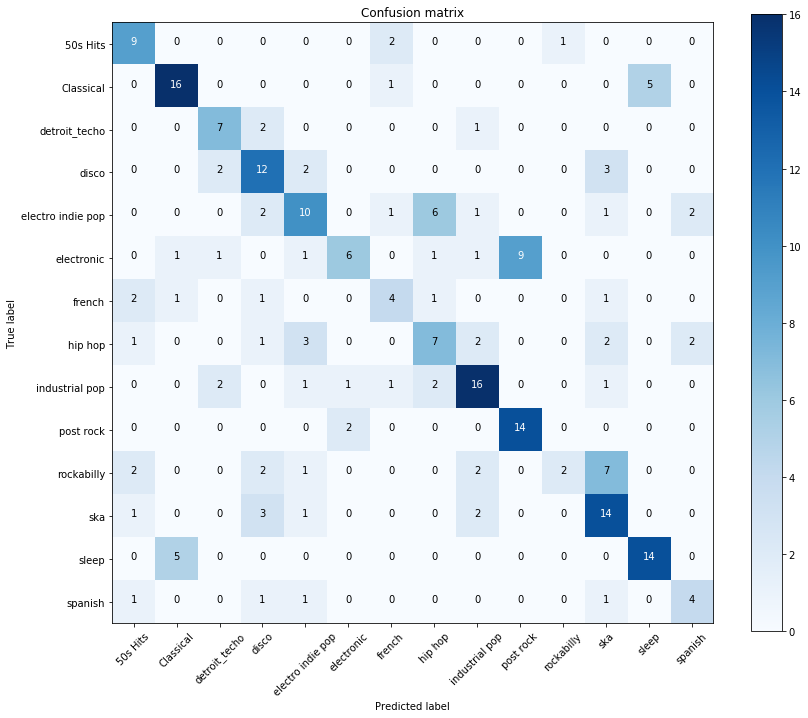

In [226]:
plot_confusion_matrix(SVC_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [227]:
filename = './models/SVC_model_3.sav'
pickle.dump(svclassifier, open(filename, 'wb'))

## SVC with less features
### Model 2
#### Using Parameters from GridSearch

In [228]:
tic = time()
svclassifier = SVC(kernel='linear', C=100)  
svclassifier.fit(X_train, y_train) 
preds = svclassifier.predict(X_test)
toc = time()
print("run time is {} seconds".format(toc-tic))

run time is 0.9170899391174316 seconds


In [229]:
SVC_score = svclassifier.score(X_test, y_test)
SVC_score

0.5462184873949579

In [230]:
SVC_confusion_matrix = confusion_matrix(y_test,preds)
SVC_classification_report = classification_report(y_test,preds)
print(SVC_confusion_matrix)
print(SVC_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))
print_metrics(y_test, preds)

[[ 9  0  0  0  0  0  2  0  0  0  1  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  8  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1 11  3  0  0  1  0  0  0  3  0  0]
 [ 0  0  0  3  8  0  1  6  2  0  0  1  0  2]
 [ 0  1  1  0  0  8  0  0  2  8  0  0  0  0]
 [ 3  1  0  1  0  0  3  0  0  0  1  1  0  0]
 [ 1  0  0  0  4  0  0  6  4  0  0  2  0  1]
 [ 0  0  3  0  2  1  1  2 14  0  0  1  0  0]
 [ 0  0  0  0  0  3  0  0  0 13  0  0  0  0]
 [ 2  0  0  3  0  0  0  0  2  0  2  7  0  0]
 [ 1  0  0  3  1  0  0  0  2  0  0 14  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 1  0  0  1  1  0  0  0  0  0  0  1  0  4]]
                   precision    recall  f1-score   support

         50s Hits       0.53      0.75      0.62        12
        classical       0.70      0.73      0.71        22
    detroit_techo       0.62      0.80      0.70        10
            disco       0.48      0.58      0.52        19
electro indie pop       0.42      0.35      0.38        23
       electro

In [231]:
svc_results = list(zip(list(preds), list(y_test)))
svc_results

[('hip hop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('post rock', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('disco', 'electro indie pop'),
 ('industrial pop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('ska', 'spanish'),
 ('industrial pop', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('sleep', 'sleep'),
 ('post rock', 'post rock'),
 ('electro indie pop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('electro indie pop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('detroit_techo', 'industrial pop'),
 ('disco', 'disco'),
 ('electro indie pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('electro indie pop', 'electro indie pop'),
 ('post rock', 'electronic'),
 ('french', '50s Hits'),
 ('industrial pop', 'industrial pop'),
 ('hip hop', 'electro indie pop'),
 (

Confusion Matrix, without normalization
[[ 9  0  0  0  0  0  2  0  0  0  1  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  8  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1 11  3  0  0  1  0  0  0  3  0  0]
 [ 0  0  0  3  8  0  1  6  2  0  0  1  0  2]
 [ 0  1  1  0  0  8  0  0  2  8  0  0  0  0]
 [ 3  1  0  1  0  0  3  0  0  0  1  1  0  0]
 [ 1  0  0  0  4  0  0  6  4  0  0  2  0  1]
 [ 0  0  3  0  2  1  1  2 14  0  0  1  0  0]
 [ 0  0  0  0  0  3  0  0  0 13  0  0  0  0]
 [ 2  0  0  3  0  0  0  0  2  0  2  7  0  0]
 [ 1  0  0  3  1  0  0  0  2  0  0 14  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 14  0]
 [ 1  0  0  1  1  0  0  0  0  0  0  1  0  4]]


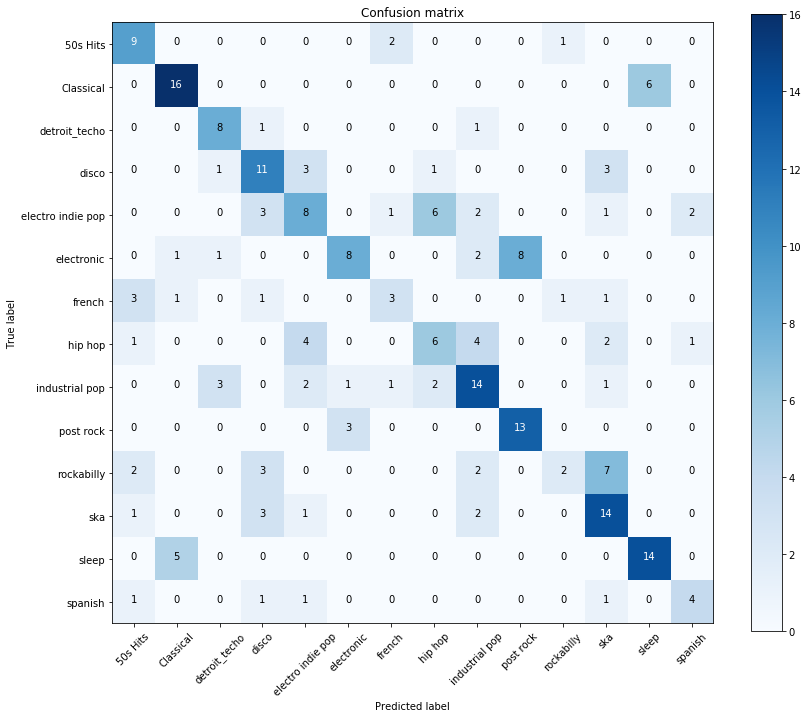

In [232]:
plot_confusion_matrix(SVC_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [233]:
filename = './models/SVC_model_4.sav'
pickle.dump(svclassifier, open(filename, 'wb'))

## Logistical Regression with less features
### Model 1
#### Not Using GridSearch 

In [234]:
logreg = LogisticRegression().fit(X_train,y_train)
logreg.score(X_test, y_test, sample_weight=None)

0.5168067226890757

In [236]:
preds = logreg.predict(X_test)
logreg_confusion_matrix = confusion_matrix(y_test,preds)
logreg_classification_report = classification_report(y_test,preds)
print(logreg_confusion_matrix)
print(logreg_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))
print_metrics(y_test, preds)

[[ 9  0  0  0  1  0  1  0  0  0  1  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  5  2  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  9  1  0  0  2  1  0  0  4  0  0]
 [ 0  0  0  3  4  0  1  9  2  0  0  1  0  3]
 [ 0  1  2  0  0  6  0  1  2  8  0  0  0  0]
 [ 4  1  0  2  0  0  1  0  0  0  1  1  0  0]
 [ 1  0  0  1  0  0  0  8  4  0  0  1  0  3]
 [ 0  0  3  0  2  1  1  1 14  0  0  2  0  0]
 [ 0  1  0  0  0  2  0  0  0 13  0  0  0  0]
 [ 2  0  0  4  1  0  0  0  1  0  3  5  0  0]
 [ 1  0  0  3  0  0  0  1  3  0  0 13  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  6]]
                   precision    recall  f1-score   support

         50s Hits       0.50      0.75      0.60        12
        classical       0.71      0.77      0.74        22
    detroit_techo       0.42      0.50      0.45        10
            disco       0.36      0.47      0.41        19
electro indie pop       0.44      0.17      0.25        23
       electro

In [237]:
logreg_results = list(zip(list(preds), list(y_test)))
logreg_results

[('hip hop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('post rock', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('disco', 'electro indie pop'),
 ('industrial pop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('ska', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('sleep', 'sleep'),
 ('post rock', 'post rock'),
 ('hip hop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('industrial pop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('electro indie pop', 'industrial pop'),
 ('ska', 'disco'),
 ('industrial pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('hip hop', 'electro indie pop'),
 ('post rock', 'electronic'),
 ('french', '50s Hits'),
 ('industrial pop', 'industrial pop'),
 ('hip hop', 'electro indie pop'),
 ('ska', 'ska'),
 ('rockabilly', 

Confusion Matrix, without normalization
[[ 9  0  0  0  1  0  1  0  0  0  1  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  5  2  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  9  1  0  0  2  1  0  0  4  0  0]
 [ 0  0  0  3  4  0  1  9  2  0  0  1  0  3]
 [ 0  1  2  0  0  6  0  1  2  8  0  0  0  0]
 [ 4  1  0  2  0  0  1  0  0  0  1  1  0  0]
 [ 1  0  0  1  0  0  0  8  4  0  0  1  0  3]
 [ 0  0  3  0  2  1  1  1 14  0  0  2  0  0]
 [ 0  1  0  0  0  2  0  0  0 13  0  0  0  0]
 [ 2  0  0  4  1  0  0  0  1  0  3  5  0  0]
 [ 1  0  0  3  0  0  0  1  3  0  0 13  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  6]]


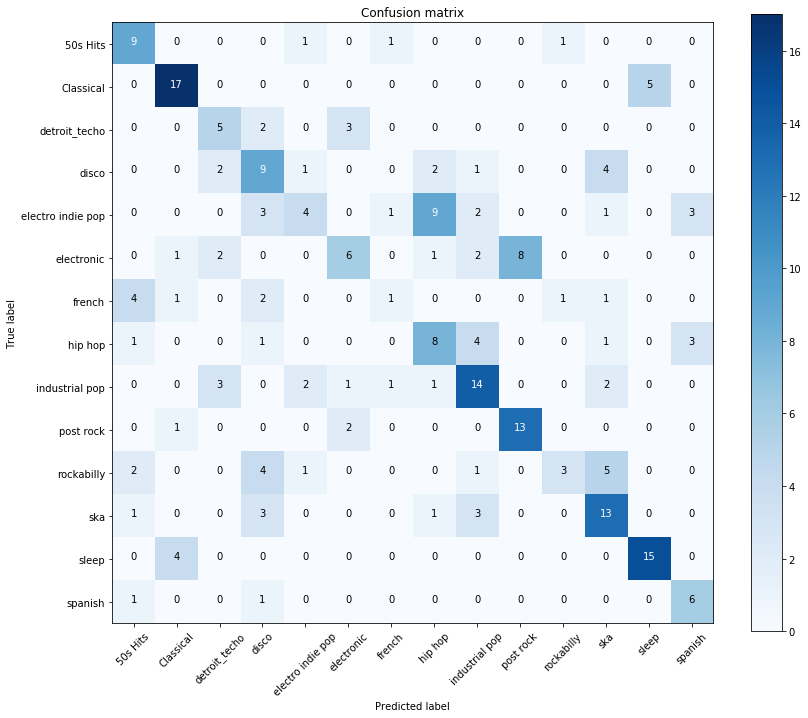

In [238]:
plot_confusion_matrix(logreg_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [239]:
filename = './models/logreg_model_3.sav'
pickle.dump(logreg, open(filename, 'wb'))

## GridSearch for Logistical Regresion with less features

In [240]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  solver=solver)

grid = GridSearchCV(estimator=logreg,
                    param_grid=param_grid,
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s


Best Score:  0.5707268170426064
Best Params:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   12.0s finished


## Logistical Regression with less features
### Model 2
#### Using GridSearch Parameters

In [241]:
logreg_1 = LogisticRegression(C = 10, 
                              penalty = 'l2', 
                              solver= 'liblinear')
logreg_1.fit(X_train, y_train)
pred = logreg_1.predict(X_test)
logreg_1_confusion_matrix = confusion_matrix(y_test,preds)
logreg_1_classification_report = classification_report(y_test,preds)
print(logreg_confusion_matrix)
print(logreg_classification_report)
print("The accuracy score is" + " "+ str(accuracy_score(y_test, preds)))

[[ 9  0  0  0  1  0  1  0  0  0  1  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  5  2  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  9  1  0  0  2  1  0  0  4  0  0]
 [ 0  0  0  3  4  0  1  9  2  0  0  1  0  3]
 [ 0  1  2  0  0  6  0  1  2  8  0  0  0  0]
 [ 4  1  0  2  0  0  1  0  0  0  1  1  0  0]
 [ 1  0  0  1  0  0  0  8  4  0  0  1  0  3]
 [ 0  0  3  0  2  1  1  1 14  0  0  2  0  0]
 [ 0  1  0  0  0  2  0  0  0 13  0  0  0  0]
 [ 2  0  0  4  1  0  0  0  1  0  3  5  0  0]
 [ 1  0  0  3  0  0  0  1  3  0  0 13  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  6]]
                   precision    recall  f1-score   support

         50s Hits       0.50      0.75      0.60        12
        classical       0.71      0.77      0.74        22
    detroit_techo       0.42      0.50      0.45        10
            disco       0.36      0.47      0.41        19
electro indie pop       0.44      0.17      0.25        23
       electro

In [242]:
logreg_1_results = list(zip(list(preds), list(y_test)))
logreg_1_results

[('hip hop', 'electro indie pop'),
 ('50s Hits', 'ska'),
 ('spanish', 'spanish'),
 ('classical', 'classical'),
 ('ska', 'ska'),
 ('post rock', 'electronic'),
 ('sleep', 'sleep'),
 ('ska', 'ska'),
 ('disco', 'electro indie pop'),
 ('industrial pop', 'electro indie pop'),
 ('detroit_techo', 'detroit_techo'),
 ('sleep', 'sleep'),
 ('spanish', 'spanish'),
 ('ska', 'industrial pop'),
 ('ska', 'disco'),
 ('classical', 'classical'),
 ('disco', 'disco'),
 ('sleep', 'sleep'),
 ('post rock', 'post rock'),
 ('hip hop', 'hip hop'),
 ('ska', 'ska'),
 ('disco', 'disco'),
 ('industrial pop', 'industrial pop'),
 ('detroit_techo', 'detroit_techo'),
 ('electro indie pop', 'industrial pop'),
 ('ska', 'disco'),
 ('industrial pop', 'electro indie pop'),
 ('rockabilly', 'rockabilly'),
 ('classical', 'classical'),
 ('hip hop', 'electro indie pop'),
 ('post rock', 'electronic'),
 ('french', '50s Hits'),
 ('industrial pop', 'industrial pop'),
 ('hip hop', 'electro indie pop'),
 ('ska', 'ska'),
 ('rockabilly', 

Confusion Matrix, without normalization
[[ 9  0  0  0  1  0  1  0  0  0  1  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  5  2  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  9  1  0  0  2  1  0  0  4  0  0]
 [ 0  0  0  3  4  0  1  9  2  0  0  1  0  3]
 [ 0  1  2  0  0  6  0  1  2  8  0  0  0  0]
 [ 4  1  0  2  0  0  1  0  0  0  1  1  0  0]
 [ 1  0  0  1  0  0  0  8  4  0  0  1  0  3]
 [ 0  0  3  0  2  1  1  1 14  0  0  2  0  0]
 [ 0  1  0  0  0  2  0  0  0 13  0  0  0  0]
 [ 2  0  0  4  1  0  0  0  1  0  3  5  0  0]
 [ 1  0  0  3  0  0  0  1  3  0  0 13  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  6]]


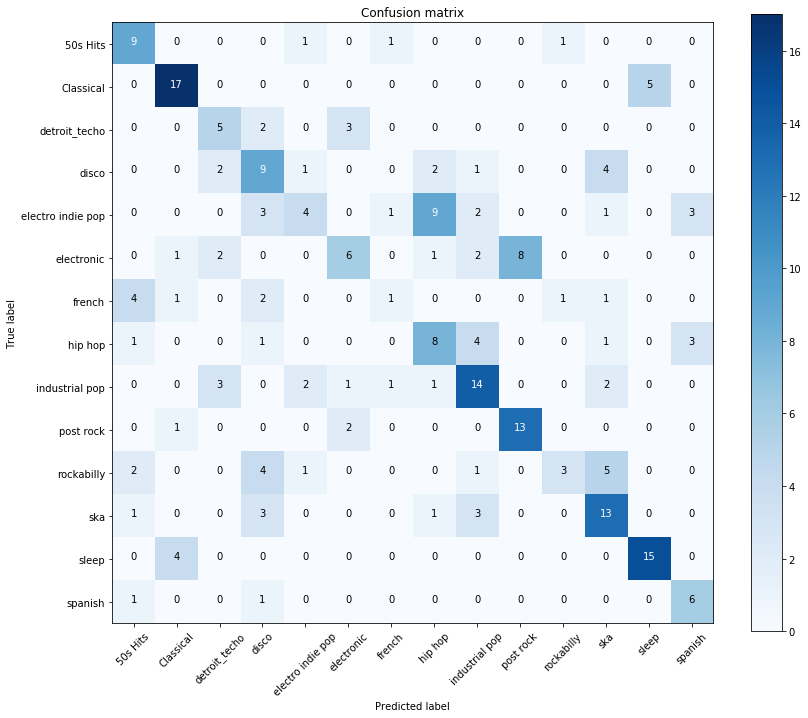

In [243]:
plot_confusion_matrix(logreg_1_confusion_matrix, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [244]:
filename = './models/logreg_4.sav'
pickle.dump(logreg_1, open(filename, 'wb'))